In [4]:
# linear regression
import numpy as np
import numpy.linalg as LA
x = np.array([2, 5, 7, 8])
y = np.array([1, 2, 3, 3])
print('x =', x)
print('y = ', y)

x = [2 5 7 8]
y =  [1 2 3 3]


In [7]:
X = np.vstack((np.ones(x.shape), x)).T
X

array([[1., 2.],
       [1., 5.],
       [1., 7.],
       [1., 8.]])

In [8]:
coef = LA.inv(X.T @ X) @ X.T @ y

print(coef)

[0.28571429 0.35714286]


In [10]:
x.shape

(4,)

In [11]:
x.reshape((x.size,1)).shape

(4, 1)

In [17]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [18]:
type(reg)

sklearn.linear_model._base.LinearRegression

In [22]:
reg.fit(x.reshape((x.size,1)), y)

In [23]:
reg.intercept_

0.2857142857142865

In [16]:
reg.coef_

array([0.35714286])

In [25]:
reg_coef = np.hstack((reg.intercept_, reg.coef_))
print(coef)
print(reg_coef)
print(np.allclose(reg_coef, coef))

[0.28571429 0.35714286]
[0.28571429 0.35714286]
True


In [26]:
X

array([[1., 2.],
       [1., 5.],
       [1., 7.],
       [1., 8.]])

In [27]:
y

array([1, 2, 3, 3])

In [28]:
# QR factorization
q, r = LA.qr(X)
print('q = \n', q)
print('r = \n', r)


q = 
 [[-0.5         0.76376262]
 [-0.5         0.10910895]
 [-0.5        -0.32732684]
 [-0.5        -0.54554473]]
r = 
 [[ -2.         -11.        ]
 [  0.          -4.58257569]]


In [29]:
print('QTy= ', q.T @ y)  # a does equal qr

QTy=  [-4.5        -1.63663418]


In [30]:
print('R-1= ', LA.inv(r))

R-1=  [[-0.5         1.2001984 ]
 [-0.         -0.21821789]]


In [31]:
print('x = R-1QTy = ', LA.inv(r) @ q.T @ y)

x = R-1QTy =  [0.28571429 0.35714286]


In [32]:
print(reg_coef)

[0.28571429 0.35714286]


In [33]:
print(np.allclose(LA.inv(r) @ q.T @ y, coef))

True


In [34]:
X

array([[1., 2.],
       [1., 5.],
       [1., 7.],
       [1., 8.]])

In [35]:
coef

array([0.28571429, 0.35714286])

In [37]:
y_pred

array([1.        , 2.07142857, 2.78571429, 3.14285714])

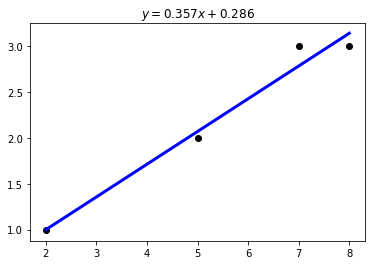

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
y_pred = X @ coef #reg.predict(x.reshape((x.size,1)))
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred, color='blue', linewidth=3)
plt.title('$y={1:.3f}x+{0:.3f}$'.format(*coef))
plt.show()

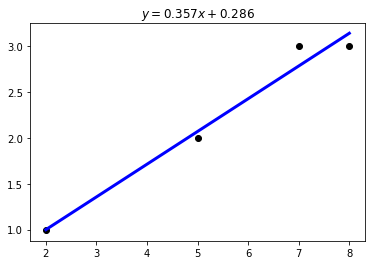

In [38]:
y_pred = reg.predict(x.reshape((x.size,1)))
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred, color='blue', linewidth=3)
plt.title('$y={1:.3f}x+{0:.3f}$'.format(*coef))
plt.show()